<a href="https://colab.research.google.com/github/jacqueshbartlett/Easy-Learning/blob/main/Stroke_prediction_%7C_Python_programming_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicitng Stroke Occurences**

# **OVERVIEW OF THE STUDY**

## Classification Problem
---
Our study attempts to predict the probability of a stroke occurring using various supervised machine learning methods.
 Classification is an area of supervised learning that tries to predict which class or category some entity belongs to, based on its features.

In our case, having a stroke ( == 1) or not ( == 0) is our dependent variable (that we are trying to predict) and our independent variables (inputs/predictors) include the individual's age, hypertension and heart disease status, whether the individual is married or not, the work and residence type, and a few health indicators which include the individual's average glucose level, BMI and smoking status.

It is important, however, to note that this dataset, as all others, is not perfectly complete and would not yield perfect predictions if there are omitted variables that bias our results.

# **INTRODUCTION**


## **Libraries used**

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

In [ ]:
# For Predicitions

# data split
from sklearn.model_selection import train_test_split

# SMOTE
from imblearn.over_sampling import SMOTE

# scaling
from sklearn.preprocessing import StandardScaler

# model Evaluation
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



## **Our Dataset**

In [ ]:
 # importing the dataset
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [ ]:
# dataset overview
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## **Cleaning Our Dataset**

In [ ]:
#dataset information - note: there are null values for BMI (number 9)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
#count number of null values
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#replace null values with mean for that column
dataset.bmi.replace(to_replace=np.nan, value=dataset.bmi.mean(), inplace=True)

In [ ]:
#confirm that there are no more null values
dataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
#overview of the clean dataset
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# Remove Individual's ID
dataset = dataset.drop('id',axis = 1)

In [ ]:
# where stroke is == 1

dataset[dataset['stroke']== 1].describe().T

,count,mean,std,min,25%,50%,75%,max
age,249.0,67.728193,12.727419,1.32,59.00,71.000000,78.00,82.00
hypertension,249.0,0.265060,0.442254,0.00,0.00,0.000000,1.00,1.00
heart_disease,249.0,0.188755,0.392102,0.00,0.00,0.000000,0.00,1.00
avg_glucose_level,249.0,132.544739,61.921056,56.11,79.79,105.220000,196.71,271.74
bmi,249.0,30.217789,5.825589,16.90,27.00,28.893237,32.50,56.60
stroke,249.0,1.000000,0.000000,1.00,1.00,1.000000,1.00,1.00


# **DESCRIPTIVE AND VISUAL ANALYSIS**

## **Correlation Matrix**

We decided to use a matrix to visually understand the relations of correlation between the different variables.

In particular, as it can be noticed from the correlation coefficients, the variables are **positively correlated** but there are **no strong correlations**. 

The variable that presents the strongest correlation with the others is 'age', which follows logically from the fact that older individuals on average suffer more from high BMI, high glucose level, hypertension and heart diseases than younger individuals.


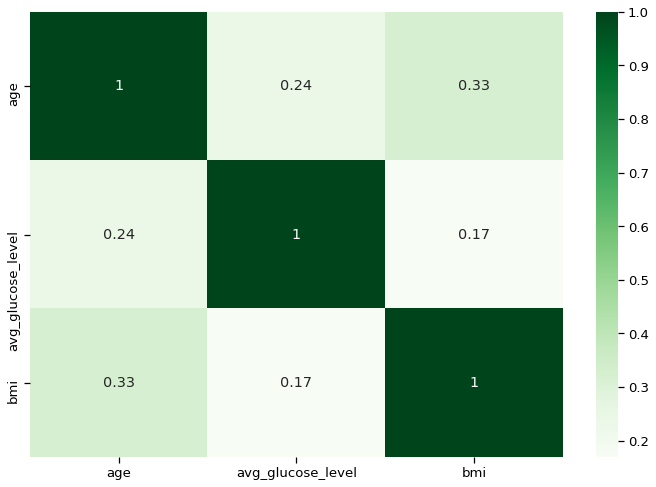

In [ ]:
# correlation matrix - short

plt.figure(figsize=(10,7))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(dataset[['age','avg_glucose_level','bmi']].corr(method='pearson'),cmap='Greens', annot=True);
plt.tight_layout()

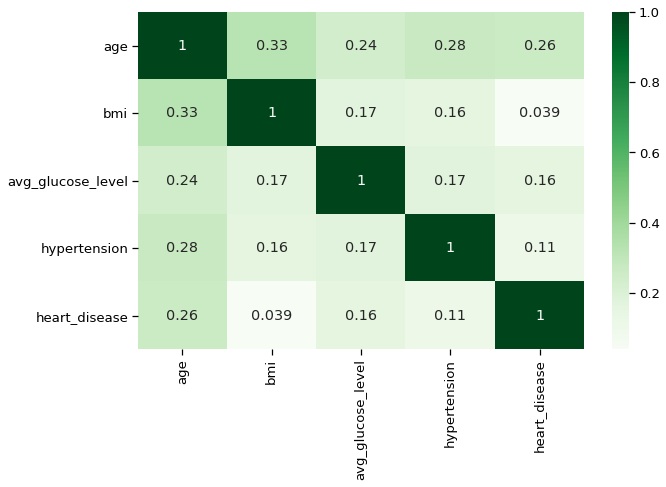

In [ ]:
# correlation matrix - extended

plt.figure(figsize=(10,7))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(dataset[['age','bmi','avg_glucose_level','hypertension','heart_disease','smoking_status']].corr(method='pearson'),cmap='Greens', annot=True);
plt.tight_layout()

## **Count Plots**

In order to gain a better understanding of our sample, we conduct a basic visual analysis of our independent and predictor variables.

Understanding that in our sample seems to be a **58.5% female** presence, **9.7%** suffered of **hypertension**, **65.6%** have been married, **32.7%** have had experiences **smoking** (former or current smoker combined)

0    4861
1     249
Name: stroke, dtype: int64


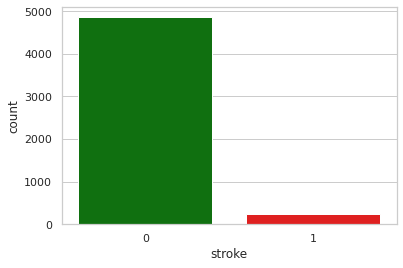

In [ ]:
# Stroke incidence - Imbalaced (more on that later)
print(dataset.stroke.value_counts())
sns.set_theme(style="whitegrid")
ax = sns.countplot(data=dataset, x="stroke",palette=['green','red'])
plt.show()

0    4612
1     498
Name: hypertension, dtype: int64


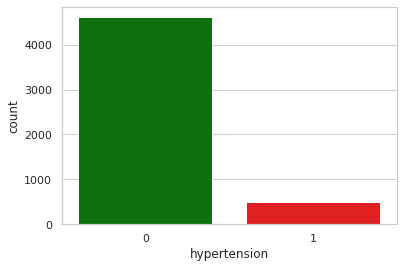

In [ ]:
# Hypertension - Only a few of the individuals suffer from hypertension

print(dataset.hypertension.value_counts())
sns.set_theme(style="whitegrid")
ax = sns.countplot(data=dataset, x="hypertension",palette=['green','red'])
plt.show()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


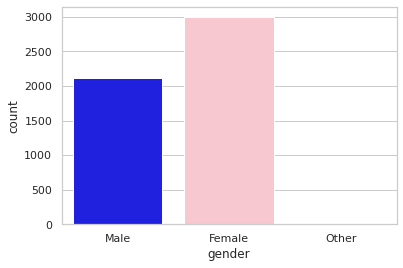

In [ ]:
# Gender - higher female count

print(dataset.gender.value_counts())
sns.set_theme(style="whitegrid")
ax = sns.countplot(data=dataset, x="gender",palette=['blue','pink'])
plt.show()

Yes    3353
No     1757
Name: ever_married, dtype: int64


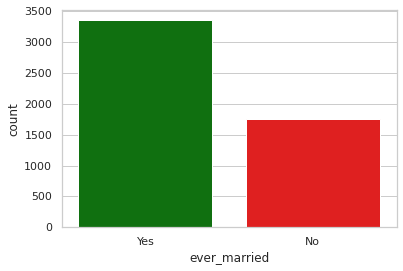

In [ ]:
# Marriage status - ratio 2:1 of married to non-married

print(dataset.ever_married.value_counts())
sns.set_theme(style="whitegrid")
ax = sns.countplot(data=dataset, x="ever_married",palette=['green','red'])
plt.show()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


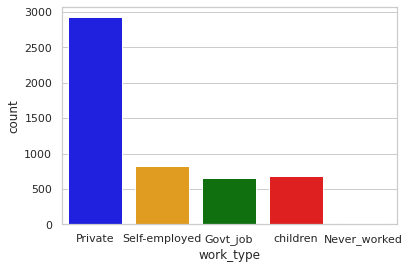

In [ ]:
# Work type - every person is employed or not in working age, private sector is the most prominent

print(dataset.work_type.value_counts())
sns.set_theme(style="whitegrid")
ax = sns.countplot(data=dataset, x="work_type",palette=['blue','orange','green','red','yellow'])
plt.show()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


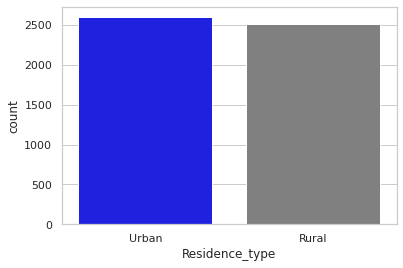

In [ ]:
# Residence type - Balanced
print(dataset.Residence_type.value_counts())
sns.set_theme(style="whitegrid")
ax = sns.countplot(data=dataset, x="Residence_type",palette=['blue','grey'])
plt.show()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


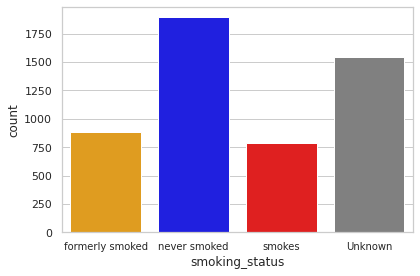

In [ ]:
# Smoking habit - large number of unknowns, around 1/3 of the knowns have never smoked

print(dataset.smoking_status.value_counts())
sns.set_theme(style="whitegrid")
ax = sns.countplot(data=dataset, x="smoking_status",palette=['orange','blue','red','grey'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

## **Distribution plots**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



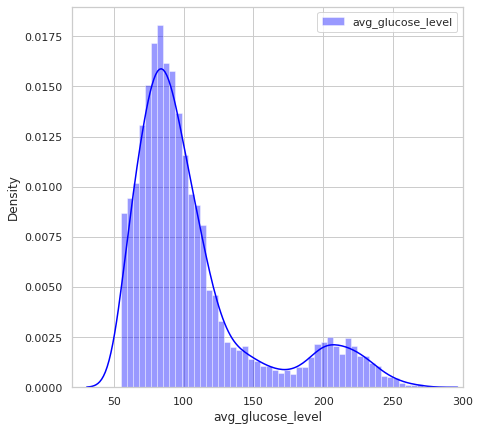

In [ ]:
# Average Glucose Level 

fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.avg_glucose_level, color="blue", label="avg_glucose_level", kde= True)
plt.xlim([20,300])
plt.legend()

The distribution is **asymmetric to the left** and the mode of average glucose level (AGL) is around 85.

Individual's are considered healthy when their AGL is below 140 mg/dL. An individual with an AGL between 140 and 199 mg/dL is considered to be pre-diabetic and above 200 mg/dL, diabetic.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



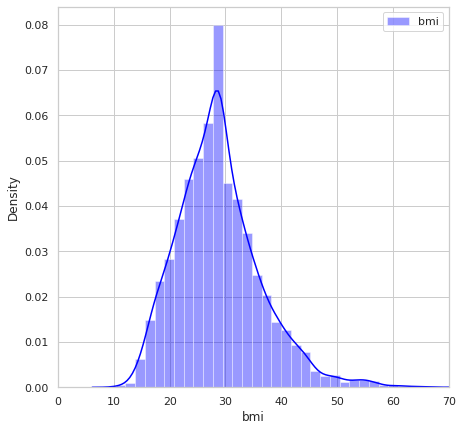

In [ ]:
#BMI 
 
fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.bmi, color="blue", label="bmi", kde= True)
plt.xlim([0,70])
plt.legend()

A **normal** BMI reading is between **18.5 and 24.9**. It can be seen however from the BMI distribution above that our sample seems to be a tad overweight where the mode of the average BMI level is between 25 and 30. Moreover, our sample includes a lot of individuals who are considered to be obese (BMI > 25).



From the scatterplots above it is clear that our sample contains many **obese** (BMI>30) and a significant amount of **diabetic** (AGL>200) individuals.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



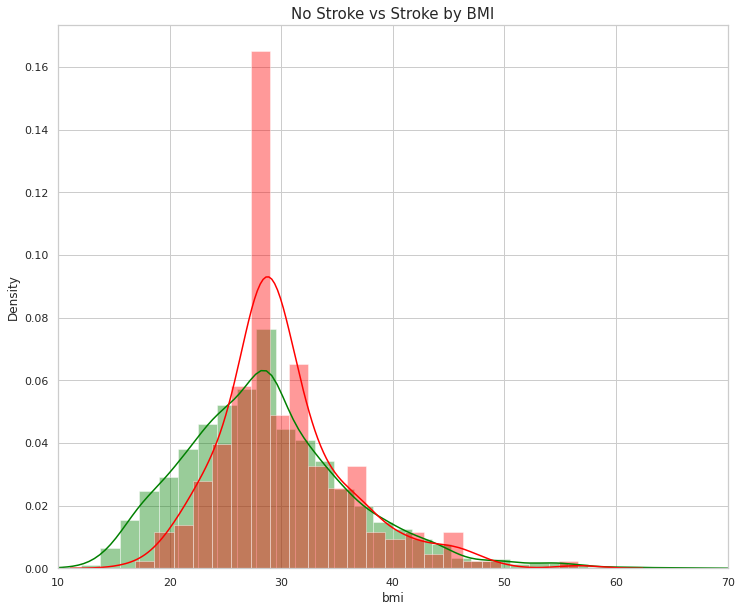

In [ ]:
#stroke incidence by BMI - density of people with higher BMI (overweight) is higher, thus revealing a higher stroke incidence
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["bmi"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["bmi"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10,70])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



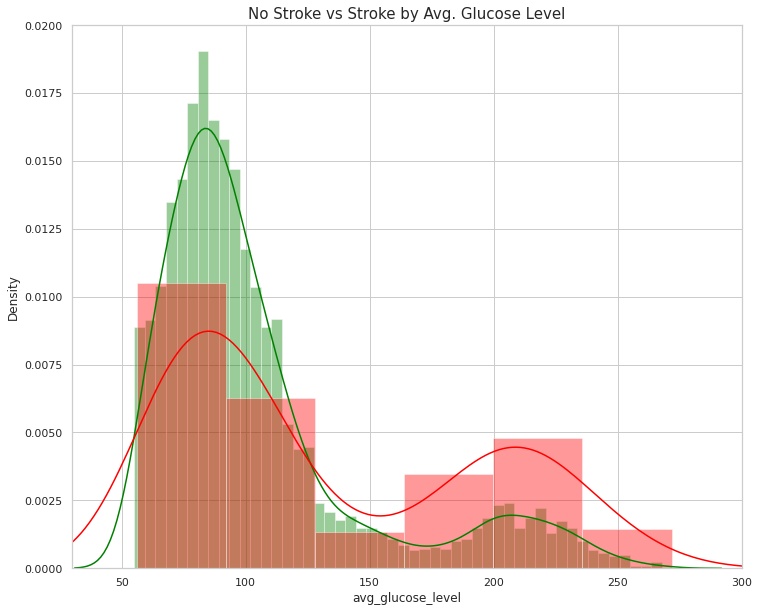

In [ ]:
#As it can be noticed, the portion of the sample which suffered a stroke has a distribution that presents 2 maximums: an absolute maximum, around the healthy level of glucose and a relative maximum around the 200lv (diabetes)
#Although this doesn't suggest a correlation between the 2 factors, it is interesting to notice that being diabetic might have influenced the risk of stroke

#stroke incidence by glucose level - average glucose level > 150 increases incidence of stroke
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["avg_glucose_level"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Avg. Glucose Level', fontsize=15)
plt.xlim([30,300])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



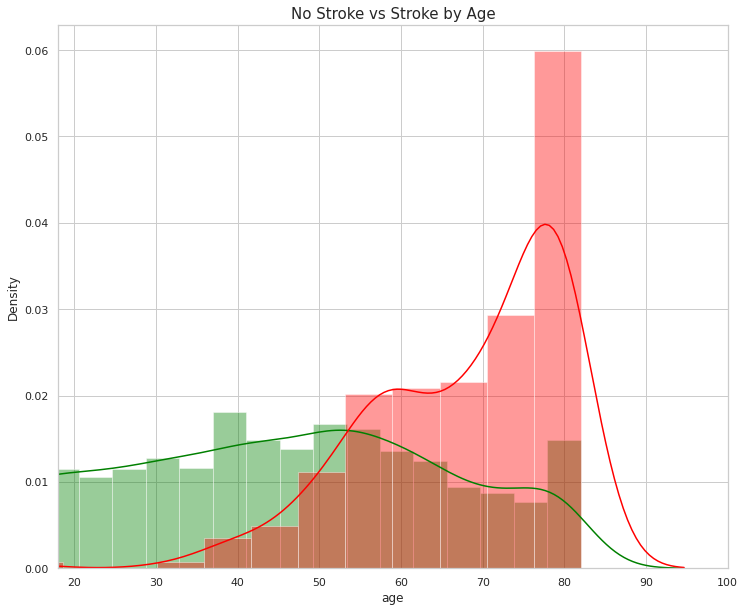

In [ ]:
#with changing lifestyles, increase in stress levels and lower body resilience, it can be noticed, as common sense would suggest that the majority of people who suffered a stroke are >50 yo
#stroke incidence by age - age > 50 increases incidence of stroke very steeply
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["age"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["age"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.xlim([18,100])
plt.show()

## **Scatter plots**

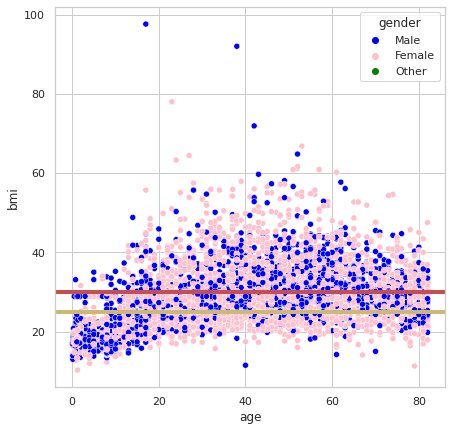

In [ ]:
# BMI & Age - BMI > 25 indicates an overweight condition, BMI > 30 indicates an obese condition

fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=dataset, x="age", y="bmi", hue='gender',palette=['blue','pink','green'])
graph.axhline(y= 25, linewidth=4, color='y', linestyle= '-')
graph.axhline(y= 30, linewidth=4, color='r', linestyle= '-')
plt.show()

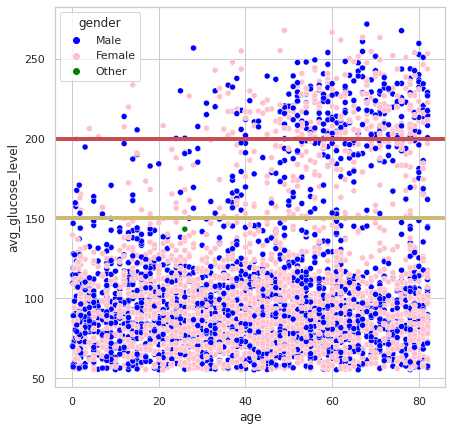

In [ ]:
# AGL & Age - avg glucose level > 150 is impaired, > 200 indicates a diabetic condition

fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=dataset, x="age", y="avg_glucose_level", hue='gender',palette=['blue','pink','green'])
graph.axhline(y= 150, linewidth=4, color='y', linestyle= '-')
graph.axhline(y= 200, linewidth=4, color='r', linestyle= '-')
plt.show()

# **PREPARING THE DATA FOR THE PREDICTIVE ANALYSIS**
---



## **Splitting the Dependent and Independent Variables**

In [ ]:
# dropping stroke variable to be predicted and assign to y

X = dataset.drop(['stroke'], axis = 1)
y = dataset.pop('stroke')

In [ ]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked


In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

## **Encoding the Data**
---



### One Hot Encoder
With **One Hot Econding** each category value is converted into a new column and assigned a 1 or 0 value to the column.

In [ ]:
# One Hot Encoder to encode categorical columns Gender, Work Type and Smoking Status

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
column_transform = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [0,5,9])], remainder= 'passthrough')
X = np.array(column_transform.fit_transform(X))

In [ ]:
X

array([[0.0, 1.0, 0.0, ..., 'Urban', 228.69, 36.6],
       [1.0, 0.0, 0.0, ..., 'Rural', 202.21, 28.893236911794673],
       [0.0, 1.0, 0.0, ..., 'Rural', 105.92, 32.5],
       ...,
       [1.0, 0.0, 0.0, ..., 'Rural', 82.99, 30.6],
       [0.0, 1.0, 0.0, ..., 'Rural', 166.29, 25.6],
       [1.0, 0.0, 0.0, ..., 'Urban', 85.28, 26.2]], dtype=object)

### Label Encoder

**Label Encoding** involves converting each value in a column to a number, such as yes/no answers or dwelling demographics. 

In [ ]:
# Label Encoder to encode binary columns ever_married and residence_type

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X[:,15] = label_encoder.fit_transform(X[:,15])
X[:,16] = label_encoder.fit_transform(X[:,16])

In [ ]:
X

array([[0.0, 1.0, 0.0, ..., 1, 228.69, 36.6],
       [1.0, 0.0, 0.0, ..., 0, 202.21, 28.893236911794673],
       [0.0, 1.0, 0.0, ..., 0, 105.92, 32.5],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 82.99, 30.6],
       [0.0, 1.0, 0.0, ..., 0, 166.29, 25.6],
       [1.0, 0.0, 0.0, ..., 1, 85.28, 26.2]], dtype=object)

## **Scaling**
---

Feature Scaling is a technique to **standardize** the independent features present in the data in a fixed range. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one. Without feature scaling ML algorithms tend to give more weight to greater values and less weight to lower values, regardless of the unit of the values.


In [ ]:
# splitting the data

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Scale the Data
from sklearn.preprocessing import StandardScaler 
std_scalar = StandardScaler()
X_train = std_scalar.fit_transform(X_train)
X_test = std_scalar.transform(X_test)

## **Is the data balanced?**

0    95.229941
1     4.770059
Name: stroke, dtype: float64


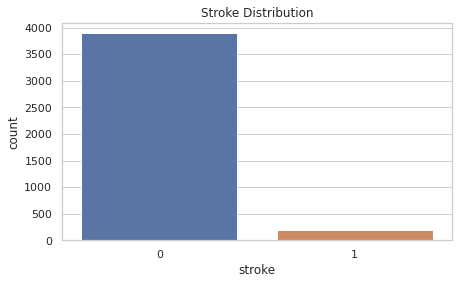

In [ ]:
# Compare stroke == 1 and == 0 

plt.figure(figsize=(7,4))
sns.countplot(x=y_train);
plt.title('Stroke Distribution');
print(y_train.value_counts(1)*100) # % of Stroke labels

## **SMOTE Oversampling**

SMOTE - **Synthetic Minority Oversampling Technique** is an oversampling technique where the **synthetic samples** are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.

In [ ]:
# SMOTE Oversampling

# Illustrate what SMOTE does

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))


Before OverSampling, counts of label '1': 195
Before OverSampling, counts of label '0': 3893 



In [ ]:
# SMOTE

SMOTE_oversample = SMOTE(random_state=1)
X_train,y_train = SMOTE_oversample.fit_resample(X_train, y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
# Illustrate what SMOTE does

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))

After OverSampling, the shape of train_X: (7786, 19)
After OverSampling, the shape of train_y: (7786,) 

After OverSampling, counts of label '1': 3893
After OverSampling, counts of label '0': 3893


[0 0 0 ... 1 1 1]


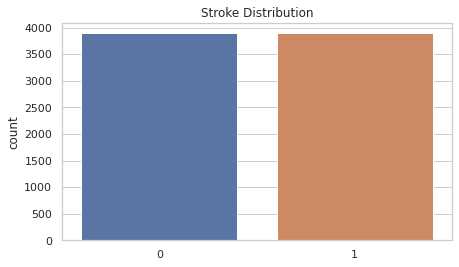

In [ ]:
# Compare stroke == 1 and == 0 after SMOTE

plt.figure(figsize=(7,4))
sns.countplot(x=y_train);
plt.title('Stroke Distribution');
print(y_train) # % of Stroke labels

# **MODEL SELECTION**
---



## **Importing predictive models**

In [ ]:
# Import Predictive Models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
# Import Precision Model Metrics to assess accuracy 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, average_precision_score
from sklearn.model_selection import cross_val_score

## **Different Predictive Models**

Just a quick note on the metrics:

**Training Set Accuracy:** Accuracy of the Model in the Training Set

**Test Set Accuracy:** Accuracy of the Model on the Test Set

**Test Set F1-score:** The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.

### **Logistic Regression**

**Logistic regression** models the *probabilities* for classification problems with two possible outcomes. It's an extension of the linear regression model for classification problems.

In [ ]:
# Logistic Regression:

Log_Reg = LogisticRegression()

# fit the model
Log_Reg.fit(X_train, y_train)

# model score
Predict_train_Log_Reg = Log_Reg.predict(X_train)
Predict_test_Log_Reg = Log_Reg.predict(X_test)

# accuracy score
Log_Reg_train_score = Log_Reg.score(X_train,y_train)
Log_Reg_test_score = Log_Reg.score(X_test,y_test)

# F1 score
Log_Reg_f1 = metrics.f1_score(y_test, Predict_test_Log_Reg)

print('Training Set Accuracy',Log_Reg_train_score)
print('Test Set Accuracy',Log_Reg_test_score)
print('Test Set F1-score',Log_Reg_f1)
print('\n')


Training Set Accuracy 0.7960441818648857
Test Set Accuracy 0.7720156555772995
Test Set F1-score 0.2508038585209003




### **K-Nearest Neighbor Classifier**

KNN is a non-parametric algorithm that does not need any training data points for model generation. Non-parametric means there are no assumptions needed for underlying data distribution which implies that the model structure is determined from the dataset.

K-Neighbor Classifier is a Classification version of KNN where Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.



In [ ]:
# KNeighbours_Classifier:

KNC = KNeighborsClassifier()

# fit the model
KNC.fit(X_train, y_train)

# model score
Predict_train_KNC = KNC.predict(X_train)
Predict_test_KNC = KNC.predict(X_test)

# accuracy score
KNC_train_score = KNC.score(X_train,y_train)
KNC_test_score = KNC.score(X_test,y_test)

# F1 score
KNC_f1 = metrics.f1_score(y_test, Predict_test_KNC)

print('Training Set Accuracy',KNC_train_score)
print('Test Set Accuracy',KNC_test_score)
print('Test Set F1-score',KNC_f1)
print('\n')

Training Set Accuracy 0.9419470845106601
Test Set Accuracy 0.8356164383561644
Test Set F1-score 0.18446601941747573




### **Decision Tree Classifier**

Decision Trees are a non-parametric supervised learning method used for classification and regression. Their goal is to create a model that predicts the value of a target variable (in our example having stroke == 1) by learning simple decision rules inferred from the data features.

In [ ]:
# Decision Tree Classifier:

DTC = DecisionTreeClassifier()

# fit the model
DTC.fit(X_train,y_train)

# model score
Predict_train_DTC = DTC.predict(X_train)
Predict_test_DTC = DTC.predict(X_test)

# accuracy score
DTC_train_score = DTC.score(X_train,y_train)
DTC_test_score = DTC.score(X_test,y_test)

# F1 score
DTC_f1 = metrics.f1_score(y_test, Predict_test_DTC)

print('Training Set Accuracy',DTC_train_score)
print('Test Set Accuracy',DTC_test_score)
print('Test Set F1-score',DTC_f1)
print('\n')

Training Set Accuracy 1.0
Test Set Accuracy 0.860078277886497
Test Set F1-score 0.089171974522293




### **Random Forest Classifier**

Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object, hence an "Ensemble" algorithm.

In [ ]:
# Random Forest:

RFC = RandomForestClassifier()

# fit the model
RFC.fit(X_train,y_train)

# model score
Predict_train_RFC = RFC.predict(X_train)
Predict_test_RFC = RFC.predict(X_test)

# accuracy score
RFC_train_score = RFC.score(X_train,y_train)
RFC_test_score = RFC.score(X_test,y_test)

# F1 score
RFC_f1 = metrics.f1_score(y_test, Predict_test_RFC)

print('Training Set Accuracy',RFC_train_score)
print('Test Set Accuracy',RFC_test_score)
print('Test Set F1-score',RFC_f1)
print('\n')

Training Set Accuracy 1.0
Test Set Accuracy 0.9099804305283757
Test Set F1-score 0.07999999999999999




### **XGBoost Classifier**

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework, created with performance and speed in mind.

In [ ]:
# XGBoost:

XGB = XGBClassifier()

# fit the model
XGB.fit(X_train,y_train)

# model score
Predict_train_XGB = XGB.predict(X_train)
Predict_test_XGB = XGB.predict(X_test)

# accuracy score
XGB_train_score = XGB.score(X_train,y_train)
XGB_test_score = XGB.score(X_test,y_test)

# F1 score
XGB_f1 = metrics.f1_score(y_test, Predict_test_XGB)

print('Training Set Accuracy',XGB_train_score)
print('Test Set Accuracy',XGB_test_score)
print('Test Set F1-score',XGB_f1)
print('\n')

Training Set Accuracy 0.897251477010018
Test Set Accuracy 0.8287671232876712
Test Set F1-score 0.2081447963800905




### **Which Models did the best in Predicting Stroke Occurence?**

From the selected models above we see that the **Random Forest Classifier** has the highest accuracy (approximately 91%). Note these are the baseline model predictions.

## **Find the best Hyperparameters to Tune the Models**




The **GridSearchCV** helps to loop through predefined hyperparameters and fit the estimator (model) on the training set, which allows you to select the best parameters from the listed hyperparameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]),  
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]), 
              (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}])]

In [ ]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(X_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False):
Best Accuracy : 79.46%
Best Parameters :  {'C': 0.75, 'random_state': 0}

----------------

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'):
Best Accuracy : 91.91%
Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 5}

----------------

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=

We see that with **tuning our hyperparameters** the prediticve accuracy of our models significantly increased:

**Logistic Regression:** 77% --> 79%

**KNeighbors Classifier:** 84% --> 91%

**Decision Tree Classifier:** 86% --> 92%

**Random Forest Classifier:** 91% --> 96%

**XGB Classifier:** 83% --> 87%

It is clear that the **Random Forest Classifier** has the highest accuracy out of all the algorithms for this dataset for prediciting strokes



## **Feature Importance?**

Can't do the feature importance after one hot and label encoding






# **CONCLUSIONS**

The study started by looking into a dataset collecting health conditions of a large number of individuals, that we have split into one dependent variable and several predictors, aiming at identifying the relationships between these two groups and, eventually, modeling a predictive analysis to anticipate the occurrence of a stroke in any given individual.


Moreover, modelling can be performed on datasets in order to gain a significant confidence in predicting the occurrence of stroke. In our case, the random forest classifier reached a 96% accuracy, after fine-tuning the hyperparameters, in predicting the occurrence of a stroke based on the several predictors present in the dataset.
